# Melanoma Detection Assignment

**Problem statement:** To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**Candidate:** Mrudul Kommana
**Batch:** C68

## Importing Skin Cancer Data
#### Take necessary actions to read the data

### Importing all the important libraries

In [38]:
#Install modules
#!pip install --upgrade tensorflow
#!pip install Augmentor

#Import Modules
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import Augmentor

#Import classes from module
from ast import Mod
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.src.layers.preprocessing.rescaling import Rescaling
from glob import glob


In [39]:
#Get version information for each module used
print(f"tensorflow version: {tf.__version__}")
print(f"keras version: {keras.__version__}")
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"PIL version: {PIL.__version__}")
print(f"Augmentor version: {Augmentor.__version__}")

tensorflow version: 2.19.0
keras version: 3.8.0
numpy version: 2.0.2
pandas version: 2.2.2
PIL version: 11.1.0
Augmentor version: 0.2.12


In [40]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/MyDrive/CNN_Dataset"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/CNN_Dataset


This assignment uses a dataset of about 2239 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [41]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("Train")
data_dir_test = pathlib.Path("Test")


In [42]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load Data using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [43]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [44]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
## Take 80% data as train set and 20% as validation set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [45]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [46]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Create a code to visualize one instance of all the nine classes present in the dataset

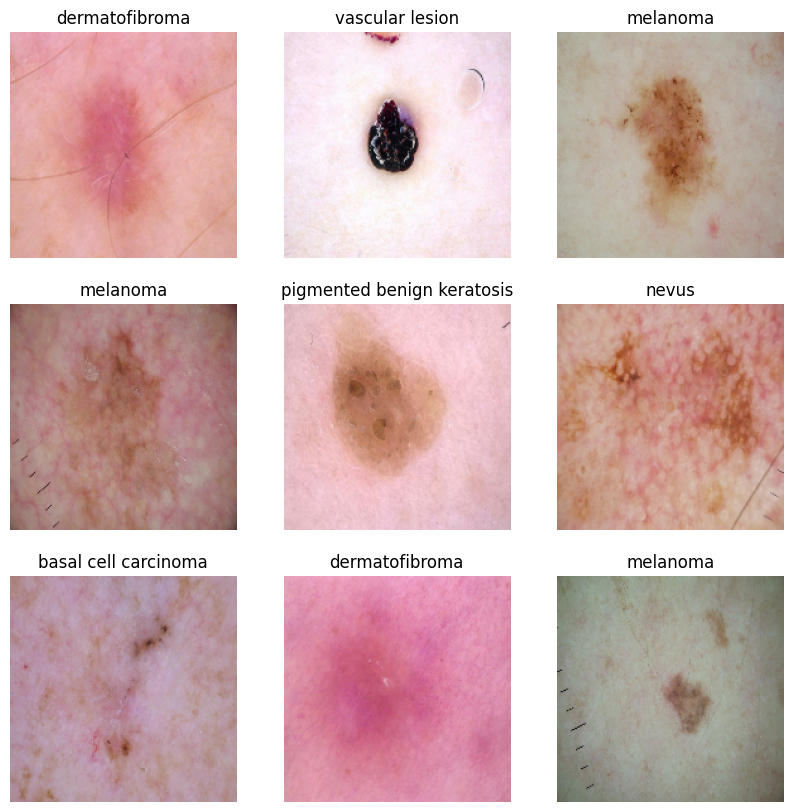

In [47]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [48]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**### Creation of model 1**

In [49]:
### Your code goes here
input_shape = (img_height,img_width,3)

model = Sequential()    #Sequential allows you to create models layer-by-layer

#First Convulation Layer
model.add(layers.Rescaling(1./255,input_shape=input_shape))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())   #Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.

#Dense Layer
model.add(layers.Dense(512,activation='relu'))

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model 1
Choose an appropirate optimiser and loss function for model training

In [50]:
# Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and
# second-order moments.
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
# View the summary of all layers
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │      26,214,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,374,985 (100.61 MB)

 Trainable params: 26,374,985 (100.61 MB)

 Non-trainable params: 0 (0.00 B)

### **Train the model 1**

In [52]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 53s 103ms/step - accuracy: 0.2040 - loss: 2.2246 - val_accuracy: 0.4298 - val_loss: 1.4978
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.4019 - loss: 1.5387 - val_accuracy: 0.4959 - val_loss: 1.2923
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.5013 - loss: 1.3362 - val_accuracy: 0.5405 - val_loss: 1.2126
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.5709 - loss: 1.1370 - val_accuracy: 0.6318 - val_loss: 1.0419
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.6865 - loss: 0.8549 - val_accuracy: 0.6978 - val_loss: 0.8492
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.7554 - loss: 0.6452 - val_accuracy: 0.7580 - val_loss: 0.6920
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.8080 - loss: 0.5283 - val_accuracy: 0.7773 - val_loss: 0.6542
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.8301 - loss: 0.4589 - val_

### Visualizing training results for Model 1

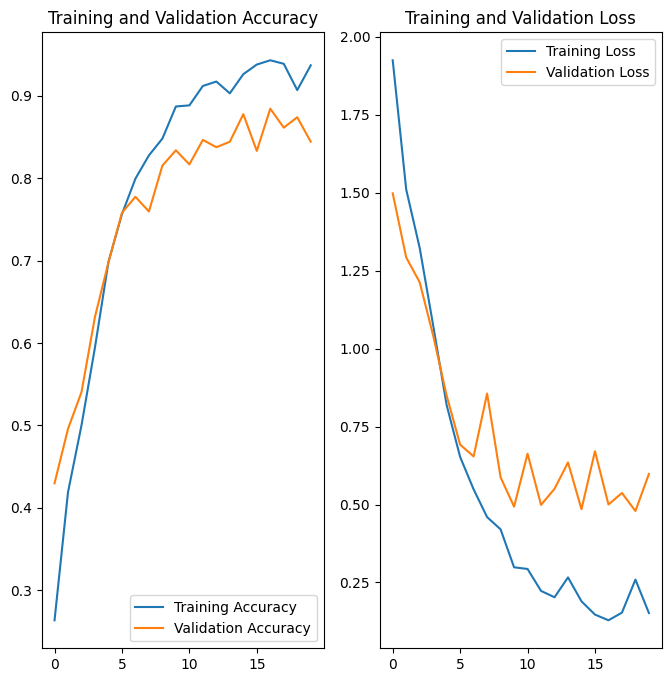

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations for Model 1:



*   With given graphs it is clear that model is overfitting.
*   **Training vs Validation** accuracy graph shows that with increase in epoch, accuracy keeps increasing but accuracy gap also increasing.
* **Training vs Validation** Loss graph shows that with increase in epochs, gap in training loss goes down, but gap in training vs Validation is widening.







### Data Augmentation Strategy

In [54]:

# after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
rescale = tf.keras.Sequential([
  #To rescale an input in the [0, 255] range to be in the [0, 1] range
  layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  #Randomly flip each image horizontally and vertically.
  layers.RandomFlip("horizontal_and_vertical"),

  #Randomly rotate each image.
  layers.RandomRotation(0.3),

  #Randomly zoom each image during training.
  layers.RandomZoom(0.2),

  #Randomly translate each image during training.
  layers.RandomTranslation(0.1, 0.1)
  ])

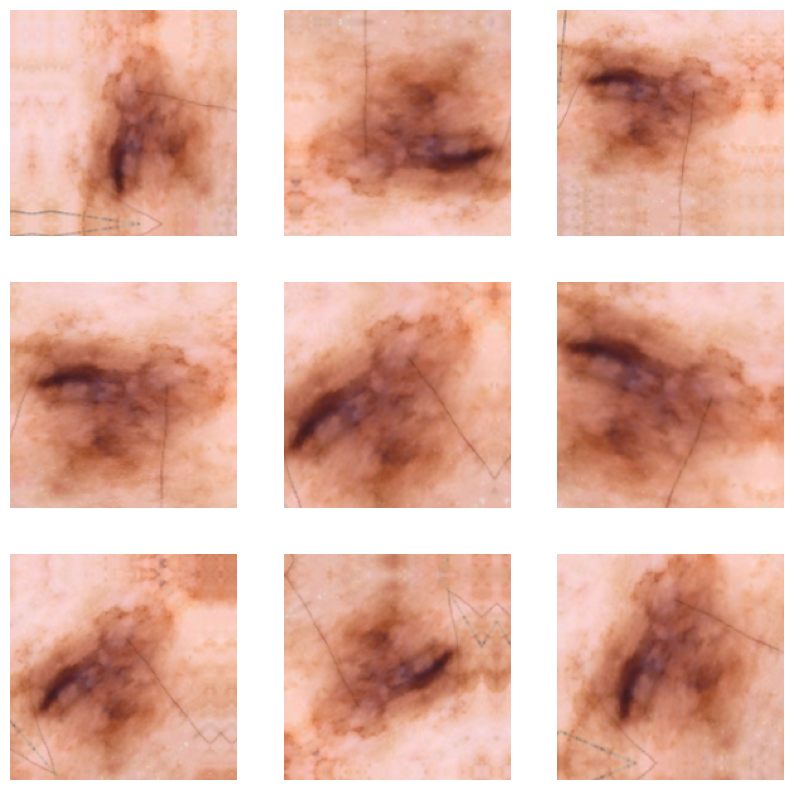

In [55]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Building Model 2 using Augumentation Strategy
#### Create the model, compile and train the model


In [56]:
## You can use Dropout layer if there is an evidence of overfitting in your findings


#Dropout layer: randomly sets input units to 0 with a frequency of rate at each step during training time,
#which helps prevent overfitting.Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.


model2 = Sequential()                     #Sequential allows you to create models layer-by-layer

model2.add(data_augmentation)             #Augmentation layer
model2.add(rescale)                       #Rescaling layer

#First Convulation Layer
model2.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Second Convulation Layer
model2.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Third Convulation Layer
model2.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model2.add(layers.Flatten())

#Dense Layer
model2.add(layers.Dense(512,activation='relu'))

#Dense Layer
model2.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model2.add(layers.Dropout(0.50))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model2.add(layers.Dense(len(class_names)))



### Compiling the model 2

In [57]:
## Your code goes here
model2.compile(optimizer='Adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model 2

In [58]:
## Your code goes here, note: train your model for 20 epochs
epochs =20
history = model2.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.1346 - loss: 2.5071 - val_accuracy: 0.2383 - val_loss: 1.9847
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.2423 - loss: 1.9694 - val_accuracy: 0.2962 - val_loss: 1.8119
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.2593 - loss: 1.8401 - val_accuracy: 0.3111 - val_loss: 1.7316
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.3057 - loss: 1.7464 - val_accuracy: 0.3697 - val_loss: 1.6308
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.3657 - loss: 1.6088 - val_accuracy: 0.3771 - val_loss: 1.6131
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.3887 - loss: 1.5590 - val_accuracy: 0.3927 - val_loss: 1.5626
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.3997 - loss: 1.5375 - val_accuracy: 0.4439 - val_loss: 1.4508
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.4021 - loss: 1.5102 - 

### Visualizing the results for Model 2

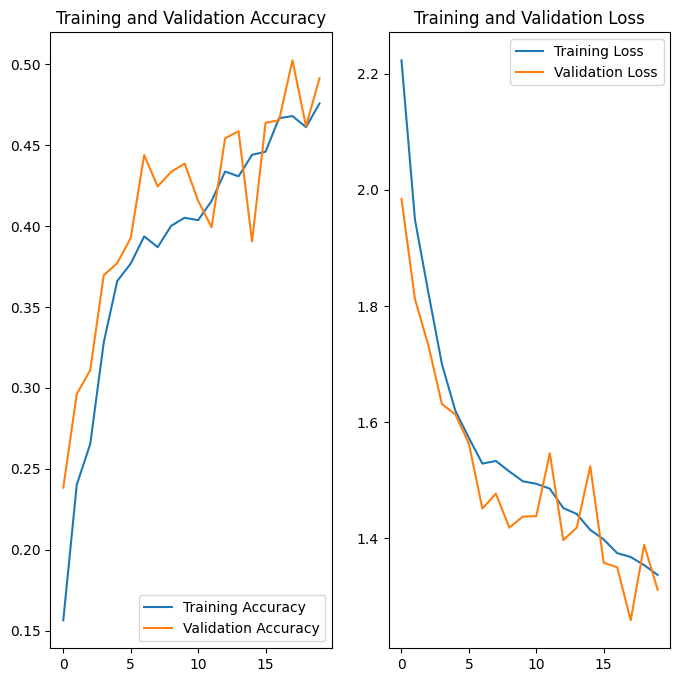

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Finding of Model 2:



*   Both the graphs are showing clear improvement in accuracy graph, over model 1
*   Validation graph is fluctuating between epochs, but overall accuracy is good at the end.
* Similar pattern is visible in loss graph as well. Loss is consistently going down with training.



## Building Model 3 (Class Imbalance problem)
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [60]:
## Class imbalance detection

def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df.sort_values('No. of Image', ascending=True)

,Class,No. of Image
8,seborrheic keratosis,77
1,dermatofibroma,95
2,actinic keratosis,114
3,vascular lesion,139
4,squamous cell carcinoma,181
0,nevus,357
7,basal cell carcinoma,376
5,melanoma,438
6,pigmented benign keratosis,462


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


<Axes: xlabel='No. of Image', ylabel='Class'>

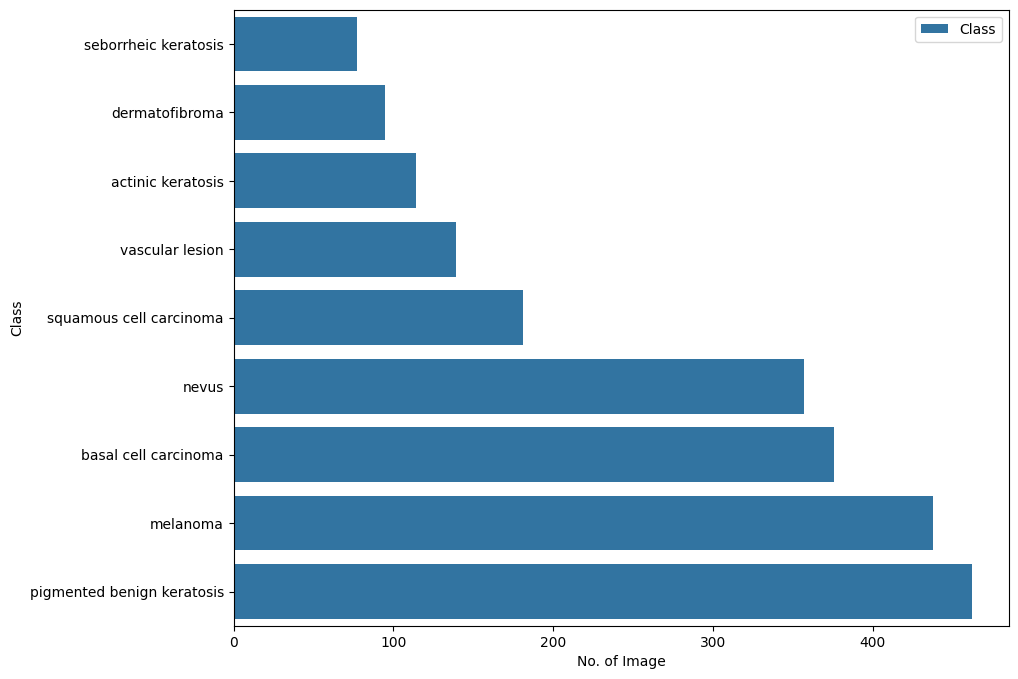

In [61]:
#Visualization of the Number of images in each class.

import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df.sort_values('No. of Image', ascending=True),
            label="Class")

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [62]:
path_to_training_dataset = "./Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=5, max_right_rotation=5)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to ./Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F855621F750>: 100%|██████████| 500/500 [00:16<00:00, 29.49 Samples/s]


Initialised with 376 image(s) found.
Output directory set to ./Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8559434F90>: 100%|██████████| 500/500 [00:15<00:00, 31.34 Samples/s]


Initialised with 95 image(s) found.
Output directory set to ./Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F8556306850>: 100%|██████████| 500/500 [00:16<00:00, 30.11 Samples/s]


Initialised with 438 image(s) found.
Output directory set to ./Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F8559220E50>: 100%|██████████| 500/500 [01:15<00:00,  6.60 Samples/s]


Initialised with 357 image(s) found.
Output directory set to ./Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=962x722 at 0x7F85591CFD50>: 100%|██████████| 500/500 [01:20<00:00,  6.18 Samples/s]


Initialised with 462 image(s) found.
Output directory set to ./Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8556478210>: 100%|██████████| 500/500 [00:21<00:00, 23.32 Samples/s]


Initialised with 77 image(s) found.
Output directory set to ./Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F855949E150>: 100%|██████████| 500/500 [00:37<00:00, 13.38 Samples/s]


Initialised with 181 image(s) found.
Output directory set to ./Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F85592B6A50>: 100%|██████████| 500/500 [00:19<00:00, 25.39 Samples/s]


Initialised with 139 image(s) found.
Output directory set to ./Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F855941FED0>: 100%|██████████| 500/500 [00:16<00:00, 29.61 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [63]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [64]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['Train/nevus/output/nevus_original_ISIC_0000239.jpg_15e4c71f-2aa0-41c7-ad95-397f8829f23e.jpg',
 'Train/nevus/output/nevus_original_ISIC_0024468.jpg_1c54a420-6f42-4184-9ce0-5264d6e8a762.jpg',
 'Train/nevus/output/nevus_original_ISIC_0026457.jpg_ef8f4fd4-16ca-40f9-ab8c-f428d40fb8cd.jpg',
 'Train/nevus/output/nevus_original_ISIC_0000225.jpg_2f4d264d-5421-4a51-af6d-32f37a1c97ad.jpg',
 'Train/nevus/output/nevus_original_ISIC_0026857.jpg_f3678bee-7112-46cf-b4cc-1f13c911c52f.jpg',
 'Train/nevus/output/nevus_original_ISIC_0000330.jpg_a6440079-a7ec-4811-91a8-4662f6284301.jpg',
 'Train/nevus/output/nevus_original_ISIC_0024646.jpg_c465ac17-9dd1-42fb-aa33-78a52946b14e.jpg',
 'Train/nevus/output/nevus_original_ISIC_0000227.jpg_58143e3c-a910-42d1-a2db-a88cb4b16980.jpg',
 'Train/nevus/output/nevus_original_ISIC_0000355.jpg_813f9277-3320-4496-9974-a1b10a8d3e4b.jpg',
 'Train/nevus/output/nevus_original_ISIC_0000240.jpg_823e0f9d-c02f-47fc-8a65-74be60d94eaa.jpg',
 'Train/nevus/output/nevus_original_ISIC

In [65]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',


In [66]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [68]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [81]:
df2['Label'].value_counts()

,count
Label,
nevus,1000
dermatofibroma,1000
actinic keratosis,1000
vascular lesion,1000
squamous cell carcinoma,1000
melanoma,1000
pigmented benign keratosis,1000
basal cell carcinoma,1000
seborrheic keratosis,1000


[link text](https://)So, now we have added 500 * 2 images (twice as have to adjust the model) to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [82]:
batch_size = 50
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [83]:
data_dir_train="./Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [84]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### Creating Model 3

In [85]:
model3 = Sequential()

model3.add(rescale)

#First Convulation layer
model3.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

#Second Convulation Layer
model3.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

#Third Convulation Layer
model3.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
model3.add(layers.Flatten())

#Dense Layer
model3.add(layers.Dense(512,activation='relu'))

#Dropout layer
model3.add(layers.Dropout(0.20))

#Batch normalization: is a method used to make artificial neural networks faster and more stable through normalization
#of the layers' inputs by re-centering and re-scaling.
model3.add(layers.BatchNormalization())

#Dense Layer
model3.add(layers.Dense(128,activation='relu'))

#Dropout layer with 30% Fraction of the input units to drop.
model3.add(layers.Dropout(0.30))

#Batch normalization
model3.add(layers.BatchNormalization())

#Dense layer with Softmax activation function.
model3.add(layers.Dense(len(class_names)))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [86]:
model3.compile(optimizer='Adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [87]:
epochs = 40
## Your code goes here, use 40 epochs.
history = model3.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/40
180/180 ━━━━━━━━━━━━━━━━━━━━ 86s 408ms/step - accuracy: 0.1535 - loss: 2.5834 - val_accuracy: 0.2172 - val_loss: 2.2314
Epoch 2/40
180/180 ━━━━━━━━━━━━━━━━━━━━ 69s 385ms/step - accuracy: 0.3583 - loss: 1.7081 - val_accuracy: 0.3783 - val_loss: 1.5808
Epoch 3/40
180/180 ━━━━━━━━━━━━━━━━━━━━ 71s 323ms/step - accuracy: 0.4479 - loss: 1.4584 - val_accuracy: 0.2697 - val_loss: 2.1999
Epoch 4/40
180/180 ━━━━━━━━━━━━━━━━━━━━ 82s 327ms/step - accuracy: 0.5060 - loss: 1.3089 - val_accuracy: 0.2092 - val_loss: 2.7086
Epoch 5/40
180/180 ━━━━━━━━━━━━━━━━━━━━ 58s 320ms/step - accuracy: 0.5528 - loss: 1.1905 - val_accuracy: 0.4855 - val_loss: 1.3050
Epoch 6/40
180/180 ━━━━━━━━━━━━━━━━━━━━ 91s 373ms/step - accuracy: 0.6186 - loss: 1.0212 - val_accuracy: 0.5648 - val_loss: 1.2329
Epoch 7/40
180/180 ━━━━━━━━━━━━━━━━━━━━ 72s 318ms/step - accuracy: 0.6566 - loss: 0.9552 - val_accuracy: 0.5234 - val_loss: 1.3187
Epoch 8/40
180/180 ━━━━━━━━━━━━━━━━━━━━ 68s 377ms/step - accuracy: 0.7186 - loss: 0

#### **Todo:**  Visualize the model results

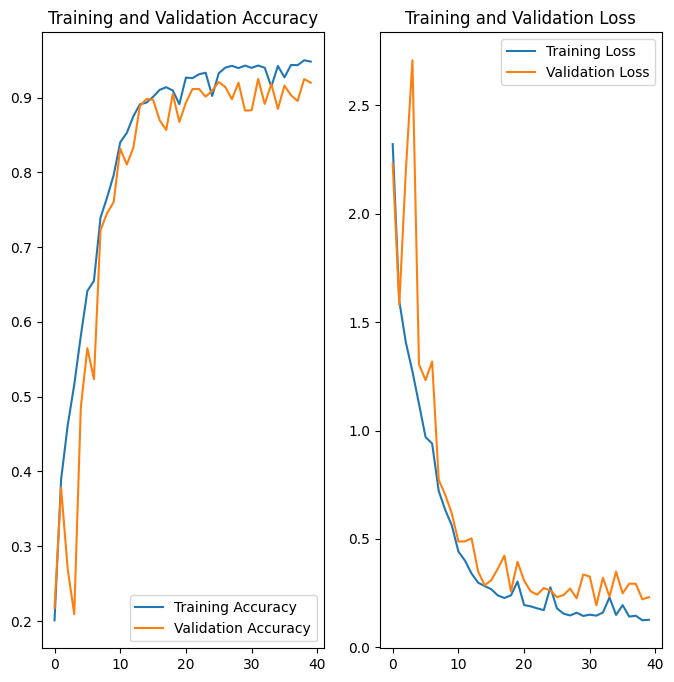

In [88]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Finding:**

* Model showing great improvement in accuracy as accuracy for Train data is 94.31 while for test data it's 91.99 %.
* Loss graph also showing some fluctuation as begining but later it's setteled for 2-3% range on both validation and train data.
* Model benefitted largaly with Aurgumentation strategy as it helped fix class imbalance problem.

